<h1>Coursera Capstone Data Collision</h1>

This notebook is the final capstone of the IBM Data Science Coursera course. With this notebook, the <b>Data Collisions - All years</b> data set for seattle will be evaluated and a prediction will be done for the probability of a collission under some given circumstances.

To achieve this, the data will be analyzed, avaluated, preprocessed and models will be created and tested to find the best model and prediction. 

<h2>Business Problem</h2>

There are several variables who can indicate that there is a high risk to have an accident, variables which influence the risk could be for example the weather condition (are the roads slippy?), time of the day (is the driver tired?) and so on.<br/>
With the following examination we want to have a deeper look onto the weakest participants in traffic, the pedestrians. Pedestrians are often not the root cause of accidents but if they are involved, they often have severe injuries. 
By analyzing the data set we want to find out, under what circumstances the risk of an accident with pedestrians is high and when the injuries are worse. The results should be used by authorities to work out a guide for pedestrians to participate safely in traffic.

<h2>Data</h2>

We will use the data set recommended for this course (<b>Data Collisions - All years</b> for Seattle 2004 to now). As a first step we create a dataframe with the raw data, analyzing the given properties.

In [1]:
import pandas as pd
import numpy as np
import wget
wget.download('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
raw_df = pd.read_csv('Data-Collisions.csv')
raw_df.head()

100% [........................................................................] 73917638 / 73917638

C:\Users\js423\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [2]:
raw_df.describe(include='all')

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1780512,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


<h2>Data Preparation</h2>

As a first step we create a new column indicating if a pedestrian was involved:

In [3]:
raw_df['PEDESTRIANINVOLVED'] = raw_df.apply (lambda row: row.COLLISIONTYPE == 'Pedestrian', axis=1) 
df = raw_df.drop(['COLLISIONTYPE'], axis=1)

Then we filter the dataset for columns that will be part of the further evaluation:

In [4]:
df = df[['PEDESTRIANINVOLVED', 'SPEEDING', 'WEATHER', 'ROADCOND', 'INCDTTM', 'LIGHTCOND', 'INATTENTIONIND', 'UNDERINFL', 'HITPARKEDCAR']]

The next step would be to have a deeper look onto the values, removing statistical outliers and set meaningful defaults on missing values.
This step is done iteratively.

In [5]:
# Only use the hour where the accident happened and the day of the week
df['ACCWEEKDAY'] = pd.to_datetime(df['INCDTTM']).dt.dayofweek
df['ACCHOUR'] = pd.to_datetime(df['INCDTTM']).dt.hour

# Remove rows where the accident took place at 00:00 as this seem to be a default value
df['TIME'] =  pd.to_datetime(df['INCDTTM']).dt.time
df = df.drop(df[df.TIME.astype(str) == '00:00:00'].index)
# Drop additional columns that are not used
df = df.drop(['INCDTTM'], axis=1)
df = df.drop(['TIME'], axis=1)


In [6]:
# Use Unknown as default for missing data
df['WEATHER'].fillna('Unknown', inplace=True)
df['ROADCOND'].fillna('Unknown', inplace=True)
df['LIGHTCOND'].fillna('Unknown', inplace=True)

# Use N as default value
df['SPEEDING'].fillna('N', inplace=True)
df['INATTENTIONIND'].fillna('N', inplace=True)

# Change 0 to N and 1 to Y
df['UNDERINFL'] = df.apply (lambda row: 'N' if row.UNDERINFL == '0' else 'Y' if row.UNDERINFL == '1' else row.UNDERINFL, axis=1) 

for column in df:
    print('Attribute values count: ')
    print(df[column].value_counts(dropna=False))
    print('\n\n')

Attribute values count: 
False    158256
True       5891
Name: PEDESTRIANINVOLVED, dtype: int64



Attribute values count: 
N    156262
Y      7885
Name: SPEEDING, dtype: int64



Attribute values count: 
Clear                       96391
Raining                     28699
Overcast                    23831
Unknown                     13082
Snowing                       776
Other                         678
Fog/Smog/Smoke                521
Sleet/Hail/Freezing Rain       90
Blowing Sand/Dirt              50
Severe Crosswind               24
Partly Cloudy                   5
Name: WEATHER, dtype: int64



Attribute values count: 
Dry               107719
Wet                41107
Unknown            13054
Ice                 1080
Snow/Slush           864
Other                114
Standing Water        95
Sand/Mud/Dirt         60
Oil                   54
Name: ROADCOND, dtype: int64



Attribute values count: 
Daylight                    100728
Dark - Street Lights On      41954
Unknown      

As we want to have a balanced dataset we select the same number of accidents for both accidents with and without pedestrian involved:

In [7]:
number_of_pedestrian_involved_true = df.loc[df.PEDESTRIANINVOLVED == True, 'PEDESTRIANINVOLVED'].count()

df_pedestrian_not_involved = df[df['PEDESTRIANINVOLVED'] == False].sample(number_of_pedestrian_involved_true, random_state=0)
df_pedestrian_involved = df[df['PEDESTRIANINVOLVED'] == True]

df_balanced = pd.concat([df_pedestrian_not_involved, df_pedestrian_involved], axis=0)

df_balanced['PEDESTRIANINVOLVED'].value_counts()

True     5891
False    5891
Name: PEDESTRIANINVOLVED, dtype: int64

<h2>Data Visualization<h2>

In this chapter we will visualize the given data, depending on if a pedestrian was involved.

<h3>Speeding</h3>

In [8]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

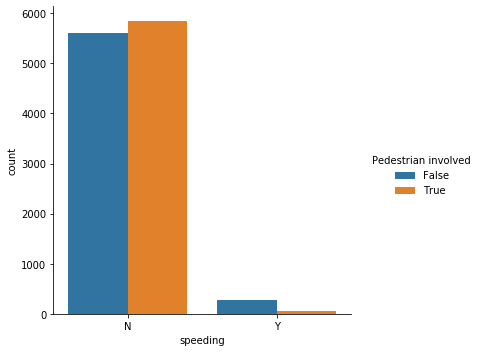

In [28]:
g = sns.catplot(x="SPEEDING", hue="PEDESTRIANINVOLVED", kind='count', data=df_balanced)
g._legend.set_title('Pedestrian involved')
g.set(xlabel='speeding', ylabel='count')

<h3>Hour of accident</h3>

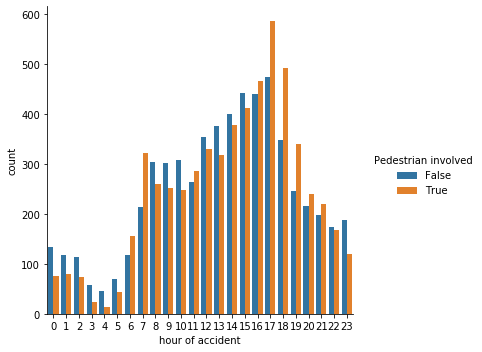

In [29]:
g = sns.catplot(x="ACCHOUR", hue="PEDESTRIANINVOLVED", kind='count', data=df_balanced)
g._legend.set_title('Pedestrian involved')
g.set(xlabel='hour of accident', ylabel='count')

<h3>Weekday of accident</h3>

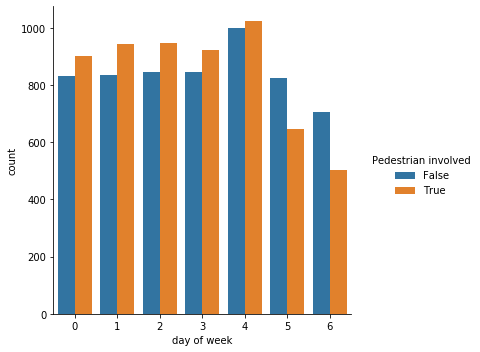

In [30]:
g = sns.catplot(x="ACCWEEKDAY", hue="PEDESTRIANINVOLVED", kind='count', data=df_balanced)
g._legend.set_title('Pedestrian involved')
g.set(xlabel='day of week', ylabel='count')

<h3>Weather</h3>

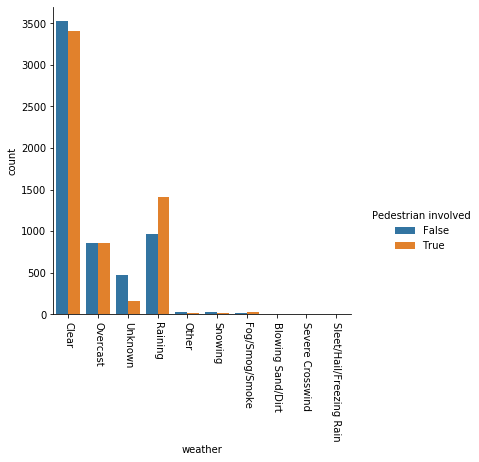

In [31]:
g = sns.catplot(x="WEATHER", hue="PEDESTRIANINVOLVED", kind='count', data=df_balanced)
g._legend.set_title('Pedestrian involved')
plt.xticks(rotation=-90, ha='center')
g.set(xlabel='weather', ylabel='count')

<h3>Road condition</h3>

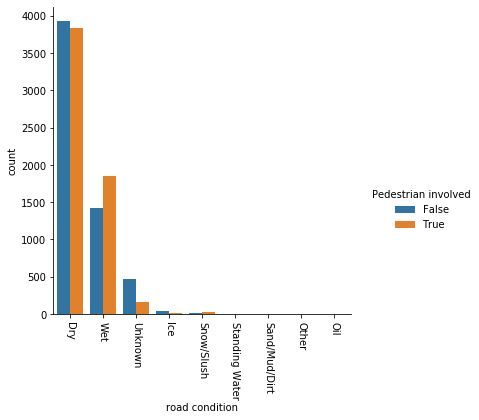

In [32]:
g = sns.catplot(x="ROADCOND", hue="PEDESTRIANINVOLVED", kind='count', data=df_balanced)
plt.xticks(rotation=-90, ha='center')
g._legend.set_title('Pedestrian involved')
g.set(xlabel='road condition', ylabel='count')

<h3>Light condition</h3>

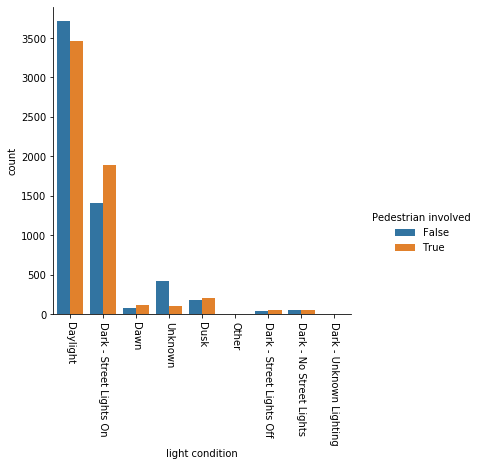

In [33]:
g = sns.catplot(x="LIGHTCOND", hue="PEDESTRIANINVOLVED", kind='count', data=df_balanced)
g._legend.set_title('Pedestrian involved')
plt.xticks(rotation=-90, ha='center')
g.set(xlabel='light condition', ylabel='count')

<h2>Methodology</h2>

To better use the categorical values in our modell we map them to their code to be numerical.

In [34]:
cat_col = df_balanced.select_dtypes(['object'])
encoding_maps = []

for column in cat_col:
    df_balanced[column] = pd.Categorical(df_balanced[column]).codes
df_balanced.head()

,PEDESTRIANINVOLVED,SPEEDING,WEATHER,ROADCOND,LIGHTCOND,INATTENTIONIND,UNDERINFL,HITPARKEDCAR,ACCWEEKDAY,ACCHOUR
10649,False,0,1,0,5,0,0,0,4,14
127198,False,1,4,8,2,0,0,0,2,18
136695,False,0,9,7,2,0,0,0,2,17
114776,False,0,1,0,5,0,0,0,3,13
187836,False,0,1,0,5,0,1,0,1,14


As we have mostly categorical data and our dependent variable PEDESTRIANINVOLVED is also categorical we have decided to use a decision tree to predict if pedestrians are involved in an accident.
For this we need to define the feature set x and the dependent variable y. We also split our data in a trainings and test set. Therefore we decided to split it in a relation 70 to 30 %.

In [35]:
X = df_balanced.iloc[:,1:9].values
Y = df_balanced['PEDESTRIANINVOLVED'].values

from sklearn.model_selection import train_test_split

X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.3, random_state=42)

As a next step we will train our decision tree model. Therefore we need to find the best hyperparameters using GridSearchCV:

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy'],
    'max_depth':range(2,9),
    'max_leaf_nodes':range(2,9),
    'min_samples_leaf':range(2,9)
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid)
grid_search.fit(X_trainset, Y_trainset)

print('Training the decision tree model results in the following best parameters: ' + str(grid_search.best_params_))
print('Mean cross-validated score of the best_estimator: ' + str(grid_search.best_score_.round(2)))


Training the decision tree model results in the following best parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'max_leaf_nodes': 8, 'min_samples_leaf': 5}
Mean cross-validated score of the best_estimator: 0.58


We use this parameters with our test data to create a decision tree. As a first step we evaluate the dependent PEDESTRIANINVOLVED variable to see how good the decision tree fit.

In [37]:
test_model = DecisionTreeClassifier(criterion=grid_search.best_params_.get('criterion'),
                                  max_depth=grid_search.best_params_.get('max_depth'),
                                  max_leaf_nodes=grid_search.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf=grid_search.best_params_.get('min_samples_leaf'))
test_model.fit(X_trainset,Y_trainset)

yh = test_model.predict(X_testset)

from sklearn import metrics

accuracy = metrics.accuracy_score(Y_testset, yh)
recall = metrics.recall_score(Y_testset, yh, average='weighted')
precision = metrics.precision_score(Y_testset, yh, average='weighted')
f1 = metrics.f1_score(Y_testset, yh, average='weighted')

print('Accuracy: ' + str(accuracy.round(2)) + '%')
print('Recall score: ' + str(recall.round(2)) + '%')
print('Precision score: ' + str(precision.round(2)) + '%')
print('F1 score: ' + str(f1.round(2)) + '%')


Accuracy: 0.58%
Recall score: 0.58%
Precision score: 0.59%
F1 score: 0.56%


All statistical values for our model are between 50 and 60 %, which shows that the decision tree does not perform well on the dataset.
Now let's plot the decision tree.

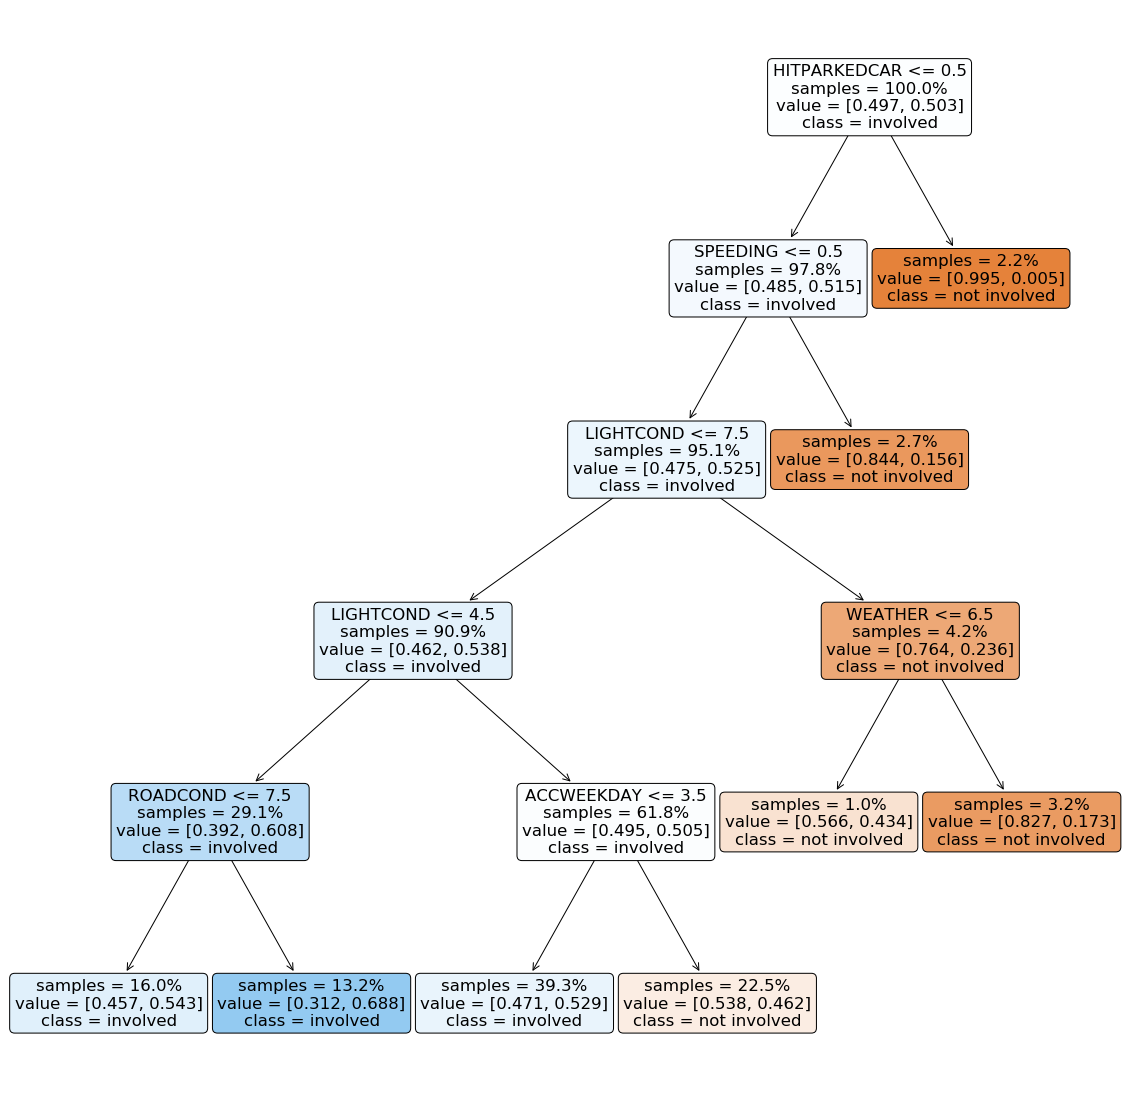

In [38]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(20,20))
treee = tree.plot_tree(test_model,
                       feature_names=df_balanced.iloc[:,1:9].columns,
                       class_names=['not involved', 'involved'],
                       filled=True, proportion=True, impurity=False, rounded=True)

As expected before, the decision tree can not predict an accident with/without pedestrians involved very well. The first 10 % of accidents without a pedestrian involved can be found wuite good by checking if a parked car was involved, the light conditions and the speed of the vehicle. But for the last 90% the accuracy is only a bit higher than 50%. 